
# Análisis de Correlación y ANOVA

El análisis estadístico ayuda a entender relaciones entre variables:

- **Correlación**: mide la fuerza y dirección de la relación lineal entre dos variables.
- **ANOVA** (Análisis de la Varianza): compara medias de múltiples grupos para evaluar si al menos uno difiere significativamente.

---



## Objetivos:

1. Analisis de correlacion (Pearson, Spearman, Kendall).
2. Análisis de Varianza (ANOVA)
3. Validación de Supuestos del ANOVA
4. Análisis de Regresión Lineal y Evaluación de Supuestos
5. BONUS : Correlación para Datos Categóricos


In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [23]:
# Dataset de ejemplo
df = sns.load_dataset("penguins").dropna()
df.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


## 1. Analisis de correlacion (Pearson, Spearman, Kendall).




### Tipos de correlación:

- **Pearson**: relación lineal (requiere variables cuantitativas y distribución normal).
- **Spearman**: relación monótona (ordinal o no normal).
- **Kendall**: coeficiente de concordancia.

### Comparación de Métodos de Correlación

| Método    | Tipo de Relación Detectada | Escala de Medición        | Ventajas                                                  | Desafíos                                                  | Perspectiva de Uso                            |
|-----------|-----------------------------|----------------------------|-----------------------------------------------------------|------------------------------------------------------------|------------------------------------------------|
| **Pearson** | Lineal                      | Cuantitativa continua       | Fácil de interpretar, muy usada, rápida                    | Sensible a outliers y no captura relaciones no lineales     | Útil cuando los datos son normales y lineales |
| **Spearman**| Monótona (creciente o decreciente) | Ordinal o continua         | No requiere normalidad, robusto a outliers                | Menos potente en relaciones puramente lineales             | Ideal para datos no paramétricos               |
| **Kendall** | Monótona (concordancia de pares) | Ordinal o continua         | Más robusto con pocos datos, interpreta probabilidad de concordancia | Computacionalmente más costoso que Spearman                | Bueno para pequeñas muestras o empates         |

> En la práctica, **Spearman** es más común que **Kendall** para grandes datasets, mientras que **Pearson** se utiliza en contextos paramétricos con supuestos de normalidad y linealidad.


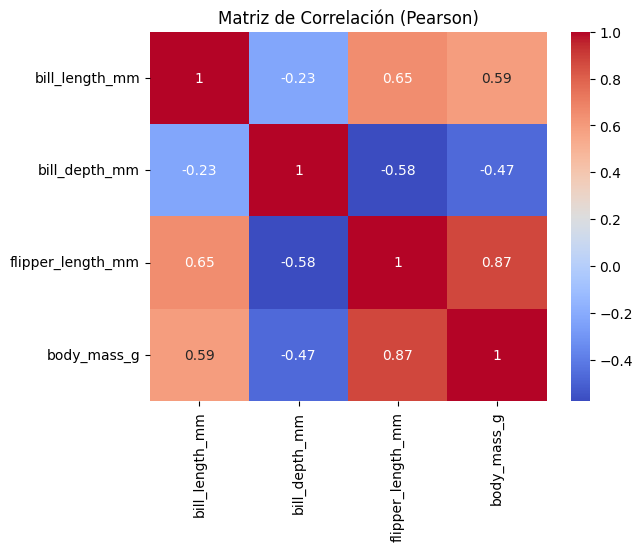

In [24]:
# Pearson
corr_pearson = df.corr(numeric_only=True, method='pearson')

# Visualizar Pearson
sns.heatmap(corr_pearson, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación (Pearson)")
plt.show()

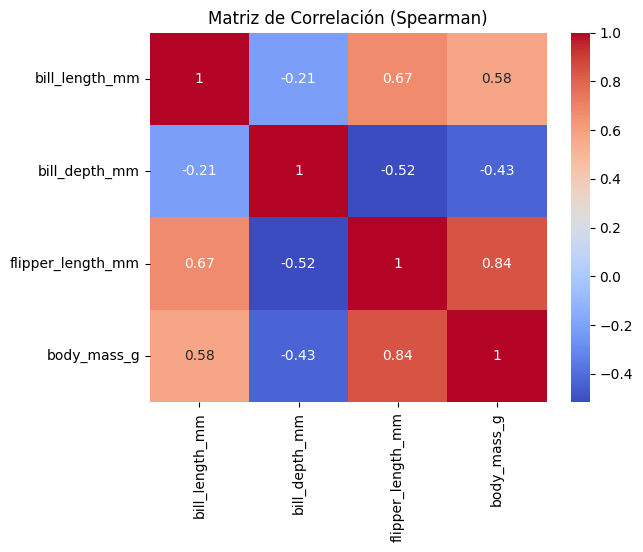

In [25]:

# Spearman
corr_spearman = df.corr(numeric_only=True, method='spearman')

# Visualizar Pearson
sns.heatmap(corr_spearman, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación (Spearman)")
plt.show()

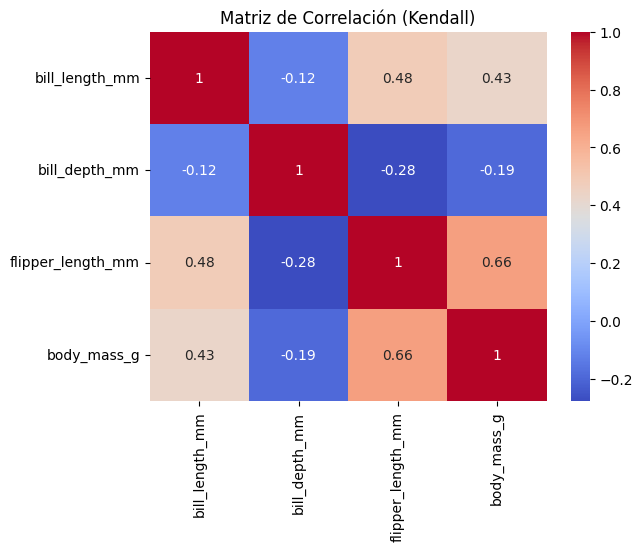

In [26]:


# Kendall
corr_kendall = df.corr(numeric_only=True, method='kendall')


# Visualizar Pearson
sns.heatmap(corr_kendall, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación (Kendall)")
plt.show()

## 2. Análisis de Varianza (ANOVA)




### Objetivo:

Determinar si existen diferencias significativas entre las medias de **tres o más grupos**.

### Supuestos:

- Normalidad de los residuos
- Homocedasticidad (varianzas iguales)
- Independencia

### Ejemplo: comparar `bill_length_mm` por especie


In [27]:

# ANOVA unidireccional
modelo = ols('bill_length_mm ~ species', data=df).fit()
anova_tabla = sm.stats.anova_lm(modelo, typ=2)

print(anova_tabla)


               sum_sq     df           F        PR(>F)
species   7015.385745    2.0  397.299437  1.380984e-88
Residual  2913.516957  330.0         NaN           NaN


## 3. Validación de Supuestos del ANOVA

Antes de confiar en los resultados del análisis ANOVA, es importante **verificar sus supuestos fundamentales**. Aquí nos enfocamos en dos pruebas estadísticas clave:

---

### Normalidad de los residuos (Shapiro-Wilk)

- **¿Qué evalúa?**  
  Verifica si los residuos del modelo se distribuyen de forma normal.

- **¿Cómo se interpreta?**  
  - **Hipótesis nula (H₀):** los residuos provienen de una distribución normal.
  - Si el **valor-p < 0.05**, se **rechaza la normalidad**, lo cual puede invalidar la inferencia del ANOVA.

- **Importancia:**  
  La normalidad es necesaria para que las **pruebas F y t sean válidas**. Si se viola este supuesto, se puede considerar usar ANOVA robusto o pruebas no paramétricas como Kruskal-Wallis.

---

### Homocedasticidad (Levene)

- **¿Qué evalúa?**  
  Verifica si las **varianzas entre los grupos** comparados son iguales.

- **¿Cómo se interpreta?**  
  - **Hipótesis nula (H₀):** todas las varianzas de los grupos son iguales.
  - Si el **valor-p < 0.05**, se **rechaza la igualdad de varianzas** (hay heterocedasticidad).

- **Importancia:**  
  La homocedasticidad garantiza que el error estimado sea uniforme entre grupos. Si se viola, el ANOVA puede dar resultados erróneos. Se puede usar una versión alternativa como **Welch’s ANOVA**.

---

In [28]:

residuos = modelo.resid
_, p_shapiro = stats.shapiro(residuos)
_, p_levene = stats.levene(
    df[df.species == 'Adelie']['bill_length_mm'],
    df[df.species == 'Chinstrap']['bill_length_mm'],
    df[df.species == 'Gentoo']['bill_length_mm']
)

print("P-valor Shapiro-Wilk (normalidad):", p_shapiro)
print("P-valor Levene (homocedasticidad):", p_levene)


P-valor Shapiro-Wilk (normalidad): 0.012739019960696834
P-valor Levene (homocedasticidad): 0.10332812696137215



### Interpretación de los Resultados

- **Prueba de Shapiro-Wilk (normalidad):**  
  El valor-p obtenido fue **0.0127**, que es **menor que 0.05**, lo que indica que **los residuos no siguen una distribución normal**.  
  → **Esto podría ser un problema para los supuestos del ANOVA.**

- **Prueba de Levene (homocedasticidad):**  
  El valor-p fue **0.103**, que es **mayor que 0.05**, por lo tanto **no se rechaza la hipótesis nula de igualdad de varianzas**.  
  → **Esto sugiere que se cumple el supuesto de homocedasticidad.**

> A pesar de la violación de la normalidad, el ANOVA es robusto si los tamaños de muestra son similares. Alternativamente, podrías usar un test no paramétrico como Kruskal-Wallis.



## Ejercicio Final

1. Realiza un análisis de correlación entre `bill_length_mm` y `flipper_length_mm`.
2. Repite el ANOVA para la variable `body_mass_g` por isla (`island`).
3. Compara visualmente con `sns.boxplot(x='island', y='body_mass_g', data=df)`.

¿Se encuentran diferencias significativas entre los grupos?



## 4. Análisis de Regresión Lineal y Evaluación de Supuestos

Para complementar el análisis estadístico, ajustaremos una **regresión lineal simple** y evaluaremos:

- Linealidad
- Normalidad de residuos
- Homocedasticidad (residuos con varianza constante)


In [29]:

# Modelo de regresión: bill_length_mm ~ flipper_length_mm
modelo_rl = ols('bill_length_mm ~ flipper_length_mm', data=df).fit()
print(modelo_rl.summary())


                            OLS Regression Results                            
Dep. Variable:         bill_length_mm   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     246.2
Date:                Tue, 08 Apr 2025   Prob (F-statistic):           7.21e-42
Time:                        04:58:00   Log-Likelihood:                -945.20
No. Observations:                 333   AIC:                             1894.
Df Residuals:                     331   BIC:                             1902.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -7.2186      3.27

## 📊 Interpretación del Modelo de Regresión Lineal

Se ajustó una regresión lineal simple con la forma:


$$\texttt{bill\_length\_mm} = \beta_0 + \beta_1 \cdot \texttt{flipper\_length\_mm} + \varepsilon
$$

---

### 🧾 Resumen General

| Elemento                      | Valor / Explicación |
|------------------------------|---------------------|
| **Dep. Variable**            | `bill_length_mm`: variable dependiente. |
| **Model**                    | OLS: Mínimos cuadrados ordinarios. |
| **R-squared (R²)**           | `0.427`: El 42.7% de la variabilidad de `bill_length_mm` se explica por `flipper_length_mm`. |
| **Adj. R-squared**           | `0.425`: R² ajustado por el número de predictores. |
| **F-statistic / Prob(F-stat)** | `246.2` / `7.21e-42`: el modelo completo es altamente significativo. |
| **Observations**             | `333`: número total de observaciones. |

---

### 📐 Coeficientes

| Variable             | Coeficiente | Interpretación                                  | P \\> \\|t\\| | Significancia |
|----------------------|-------------|------------------------------------------------|----------------|---------------|
| **Intercept**        | -7.2186     | Valor esperado de `bill_length_mm` cuando `flipper_length_mm = 0`. No es interpretable directamente. | 0.028 | significativa |
| **flipper_length_mm**| 0.2548      | Por cada mm adicional de aleta, el pico crece en promedio 0.2548 mm. | < 0.0001 | altamente significativa |

---

### 📊 Estadísticas de Diagnóstico

| Estadístico         | Interpretación |
|---------------------|----------------|
| **Durbin-Watson = 0.950** | Valor cercano a 2 indica independencia de errores. Menor a 1 sugiere autocorrelación positiva. |
| **Omnibus / Prob(Omnibus)** | Prueba de normalidad: p = 0.000 → los residuos **no siguen distribución normal**. |
| **Jarque-Bera (JB)**     | p = 1.78e-10 → también indica **no normalidad** de los residuos. |
| **Skew / Kurtosis** | Asimetría = 0.783, Curtosis = 3.886 → residuos asimétricos con colas más pesadas. |
| **Cond. No. = 2.9e+03** | Alta. Puede sugerir multicolinealidad o problemas numéricos, pero con un solo predictor no es preocupante. |

---

### ✅ Conclusiones

- El predictor `flipper_length_mm` es **altamente significativo** y tiene una **relación positiva** con `bill_length_mm`.
- El modelo explica alrededor del **43% de la varianza**.
- Existe **violación de la normalidad de los residuos**, lo cual afecta la inferencia.
- Puede haber **ligera autocorrelación** en los residuos según Durbin-Watson.

> 📌 Se recomienda complementar con visualizaciones de residuos, prueba de heterocedasticidad (Breusch-Pagan), o pruebas no paramétricas si los supuestos no se cumplen.

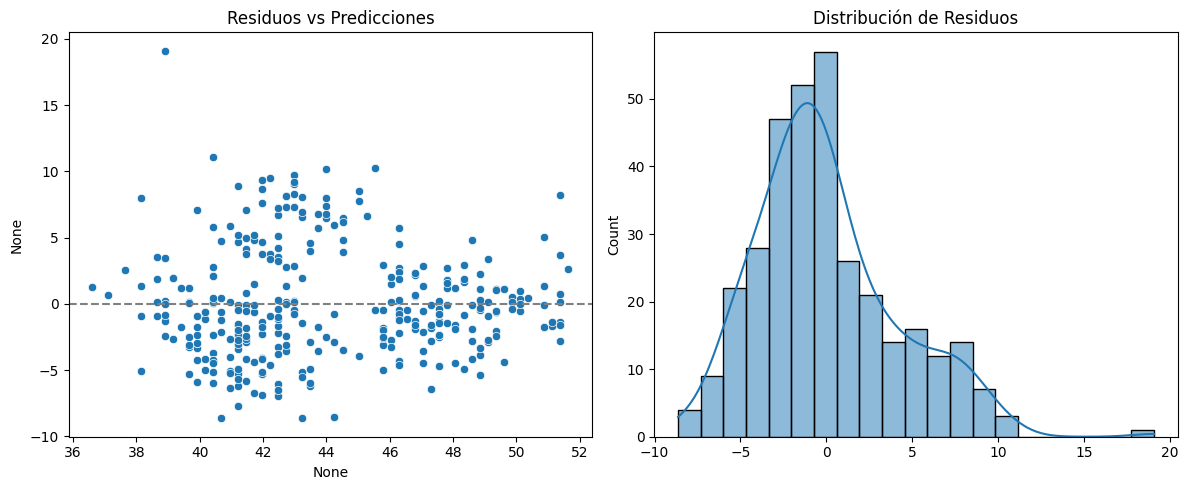

In [30]:

# Visualización de residuos
import seaborn as sns

residuos_rl = modelo_rl.resid
predicciones = modelo_rl.fittedvalues

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Residuals vs Fitted
sns.scatterplot(x=predicciones, y=residuos_rl, ax=ax[0])
ax[0].axhline(0, linestyle='--', color='gray')
ax[0].set_title("Residuos vs Predicciones")

# Distribución de residuos
sns.histplot(residuos_rl, kde=True, ax=ax[1])
ax[1].set_title("Distribución de Residuos")

plt.tight_layout()
plt.show()


## 5. BONUS: Correlación para Datos Categóricos

Cuando trabajamos con variables **categóricas**, los métodos tradicionales de correlación (como Pearson o Spearman) **no son adecuados**. A continuación se presentan dos técnicas clave para evaluar la **asociación o dependencia** entre variables categóricas:


### Comparación de Métodos de Correlación



| Método        | Tipo de Relación Detectada           | Escala de Medición        | Ventajas                                                  | Desafíos                                                       | Perspectiva de Uso                                |
|---------------|---------------------------------------|----------------------------|-----------------------------------------------------------|----------------------------------------------------------------|----------------------------------------------------|
| **Pearson**   | Lineal                                | Cuantitativa continua       | Fácil de interpretar, muy usada, rápida                    | Sensible a outliers y no captura relaciones no lineales         | Útil cuando los datos son normales y lineales     |
| **Spearman**  | Monótona (creciente o decreciente)     | Ordinal o continua          | No requiere normalidad, robusto a outliers                | Menos potente en relaciones puramente lineales                 | Ideal para datos no paramétricos                   |
| **Kendall**   | Monótona (concordancia de pares)       | Ordinal o continua          | Más robusto con pocos datos, interpreta concordancia       | Computacionalmente más costoso que Spearman                    | Bueno para pequeñas muestras o empates             |
| **Cramér's V**| Asociación (fuerza entre categorías)   | Categórica (nominal)        | Adaptado a tablas de contingencia, simple de calcular     | No proporciona dirección de la relación, requiere chi-cuadrado | Excelente para variables categóricas               |
| **Theil's U** | Asociación direccional (asimétrica)    | Categórica (nominal)        | Capta relaciones de dependencia entre variables categóricas | Asimétrico: U(X|Y) ≠ U(Y|X); más complejo de calcular          | Ideal cuando se desea estimar predicción entre variables |

### Cramér's V

- Mide la **fuerza de asociación** entre dos variables categóricas.
- Basado en la estadística **chi-cuadrado**.
- Es **simétrico**: Cramér's V(X, Y) = Cramér's V(Y, X).
- Rango de valores:  
  - 0 → Sin asociación  
  - 1 → Asociación perfecta

**Ideal para saber si dos variables categóricas están relacionadas**, sin importar cuál predice a cuál.


In [31]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

In [32]:
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

In [33]:
# Ejemplo con las variables categóricas del dataset
tabla = pd.crosstab(df['species'], df['island'])
cramers = cramers_v(tabla)
print("Coeficiente de Cramér entre species e island:", round(cramers, 3))

Coeficiente de Cramér entre species e island: 0.654


### Theil’s U (Entropía condicional)

- Mide la **dependencia direccional** entre dos variables categóricas.
- U(X|Y): cuánta información sobre X se puede obtener conociendo Y.
- Es **asimétrico**:  
  - U(X|Y) ≠ U(Y|X)
- Rango de valores:  
  - 0 → Independencia total  
  - 1 → Predicción perfecta

**Ideal para saber si una variable puede predecir otra.** Muy útil en análisis de información y modelos de clasificación.


In [34]:
import pandas as pd
import numpy as np
from math import log2

In [35]:


def conditional_entropy(x, y):
    """Entropía condicional H(X|Y)"""
    y_counter = y.value_counts()
    xy_counter = pd.crosstab(x, y)

    total_occurrences = len(x)
    entropy = 0.0

    for y_val in y_counter.index:
        p_y = y_counter[y_val] / total_occurrences
        x_given_y = xy_counter[y_val] / y_counter[y_val]
        entropy += p_y * -np.sum([p_x * log2(p_x) if p_x > 0 else 0 for p_x in x_given_y])

    return entropy

def theils_u(x, y):
    """Theil's U = 1 - H(X|Y)/H(X)"""
    s_x = x.value_counts(normalize=True)
    h_x = -np.sum([p * log2(p) for p in s_x if p > 0])
    h_x_given_y = conditional_entropy(x, y)
    if h_x == 0:
        return 1.0
    return (h_x - h_x_given_y) / h_x

In [36]:
# Aplicar Theil's U: ¿cuánto predice 'island' sobre 'species'?
u_species_given_island = theils_u(df['species'], df['island'])
print("Theil's U (species | island):", round(u_species_given_island, 3))

# También puedes invertir: ¿cuánto predice 'species' sobre 'island'?
u_island_given_species = theils_u(df['island'], df['species'])
print("Theil's U (island | species):", round(u_island_given_species, 3))

Theil's U (species | island): 0.488
Theil's U (island | species): 0.517


#### Interpretación esperada


- **U(species | island)** = 0.488  
  → Conocer la isla **reduce la incertidumbre** sobre la especie en un **48.8%**.

- **U(island | species)** = 0.517  
  → Conocer la especie **reduce la incertidumbre** sobre la isla en un **51.7%**.

Esto sugiere que ambas variables tienen **fuerza predictiva moderada** sobre la otra, siendo ligeramente más útil conocer la especie para predecir la isla.




### Visualización de Relación entre Variables Categóricas

Para variables categóricas, se pueden emplear **visualizaciones**. Estas técnicas permiten observar patrones visuales en las proporciones cruzadas entre categorías.

#### Heatmap de Proporciones

- Muestra **qué proporción** de una categoría está distribuida entre las categorías de otra variable.
- Cada fila se normaliza (por categoría de origen), revelando **patrones de distribución relativa**.
- Colores oscuros indican **fuerte concentración**.


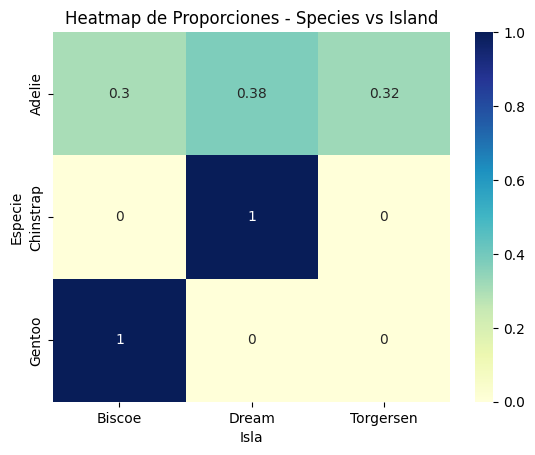

In [37]:
# Heatmap de tabla de contingencia
contingencia = pd.crosstab(df['species'], df['island'], normalize='index')
sns.heatmap(contingencia, annot=True, cmap="YlGnBu")
plt.title("Heatmap de Proporciones - Species vs Island")
plt.ylabel("Especie")
plt.xlabel("Isla")
plt.show()

#### Mosaic Plot

- Representa visualmente una **tabla de contingencia**.
- El **tamaño del área** indica la **frecuencia absoluta** de la combinación de categorías.
- Las ausencias (áreas vacías) indican **combinaciones que no existen en los datos**.


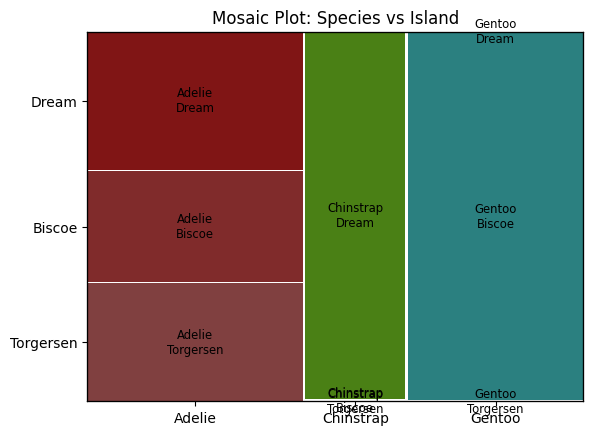

In [38]:
# Agregar visualización de relaciones categóricas con heatmap y mosaic plot
from statsmodels.graphics.mosaicplot import mosaic
# Diagrama de mosaico
mosaic(df, ['species', 'island'])
plt.title("Mosaic Plot: Species vs Island")
plt.show()

### Conclusión

Ambos métodos y visualizaciones ofrecen **formas complementarias** de analizar relaciones entre variables categóricas.  
- Usa **Cramér’s V** cuando te interesa la fuerza de asociación.  
- Usa **Theil’s U** cuando quieres estimar la capacidad de predicción de una variable sobre otra.  
- Usa visualizaciones como **heatmaps** y **mosaic plots** para **descubrir patrones visuales claros**.

> Estas herramientas son esenciales cuando se trabaja con encuestas, clasificación, segmentación o cualquier tipo de variable no numérica.